In [1]:
pip install pandas numpy scipy matplotlib seaborn plotly scikit-learn jupyter

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install statsmodels xgboost lightgbm kaliedo

  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement kaliedo (from versions: none)
ERROR: No matching distribution found for kaliedo


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import datasets

print("TODO OK")

TODO OK


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Cargar datos
df = pd.read_csv('insurance.csv')

# Exploración inicial
print("EXPLORACIÓN")
print(f"Dimensiones: {df.shape}")
print("\n Primeras filas:")
print(df.head())
print("\n Info del dataset:")
print(df.info())
print("\n Estadísticas :")
print(df.describe())
print("\n Valores nulos:")
print(df.isnull().sum())

EXPLORACIÓN
Dimensiones: (1338, 7)

 Primeras filas:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

 Info del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

 Estadísticas :
 

## REALIZAREMOS UN ANÁLISIS EXPLORATORIO EN PROFUNDIDAD DEL DATASET

#### CONFIGURO EL ESTILO

In [6]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

#### DISTRICUCIÓN DE LA EDAD

In [8]:
axes[0,0].hist(df['age'], bins=30, alpha=0.7, color='skyblue')
axes[0,0].set_title('Distribución de Edad')
axes[0,0].set_xlabel('Edad')
axes[0,0].set_ylabel('Frecuencia')


Text(4.444444444444452, 0.5, 'Frecuencia')

#### BMI

In [9]:
axes[0,1].hist(df['bmi'], bins=30, alpha=0.7, color='lightgreen')
axes[0,1].set_title('Distribución de BMI')
axes[0,1].set_xlabel('BMI')
axes[0,1].set_ylabel('Frecuencia')

Text(496.7973856209152, 0.5, 'Frecuencia')

#### SEGÚN HIJOS

In [10]:
axes[0,2].hist(df['children'], bins=6, alpha=0.7, color='orange')
axes[0,2].set_title('Distribución de Hijos')
axes[0,2].set_xlabel('Número de hijos')
axes[0,2].set_ylabel('Frecuencia')

Text(989.1503267973857, 0.5, 'Frecuencia')

#### CARGOS

In [11]:
axes[1,0].hist(np.log1p(df['charges']), bins=30, alpha=0.7, color='coral')
axes[1,0].set_title('Distribución de Cargos (log)')
axes[1,0].set_xlabel('log(Cargos)')
axes[1,0].set_ylabel('Frecuencia')

Text(4.444444444444452, 0.5, 'Frecuencia')

#### FUMADOR Y GÉNERO

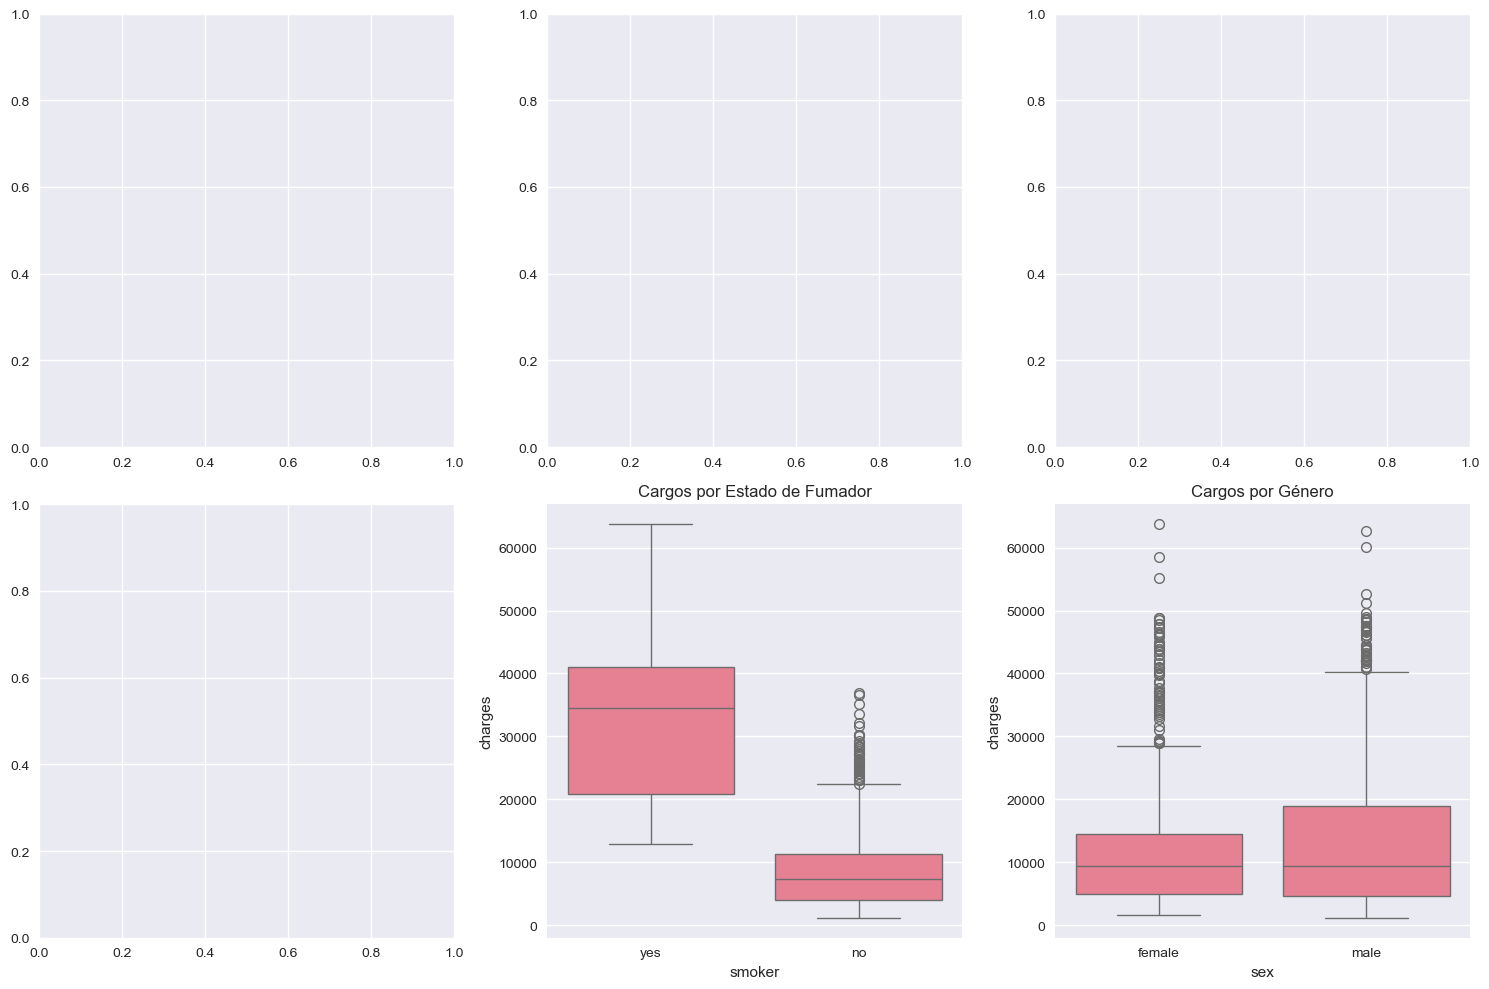

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns

sns.boxplot(data=df, x='smoker', y='charges', ax=axes[1,1])
axes[1,1].set_title('Cargos por Estado de Fumador')

sns.boxplot(data=df, x='sex', y='charges', ax=axes[1,2])
axes[1,2].set_title('Cargos por Género')

plt.tight_layout()
plt.show()

## ANALIZAMOS LAS DIFERENTES CORRELACIONES

ANÁLISIS DE CORRELACIONES:


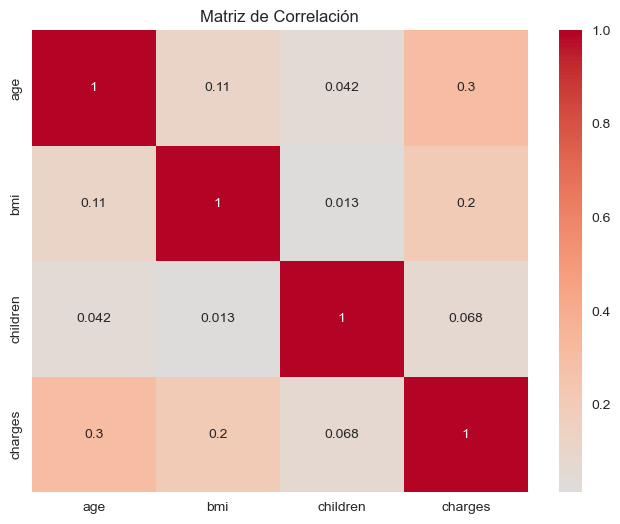

In [17]:
print("ANÁLISIS DE CORRELACIONES:")

corr_matrix = df[['age', 'bmi', 'children', 'charges']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()


## ANÁLISIS DE VARIABLES CATEGÓRICAS

DISTRIBUCIÓN DE LAS VARIABLES CATEGÓRICAS:


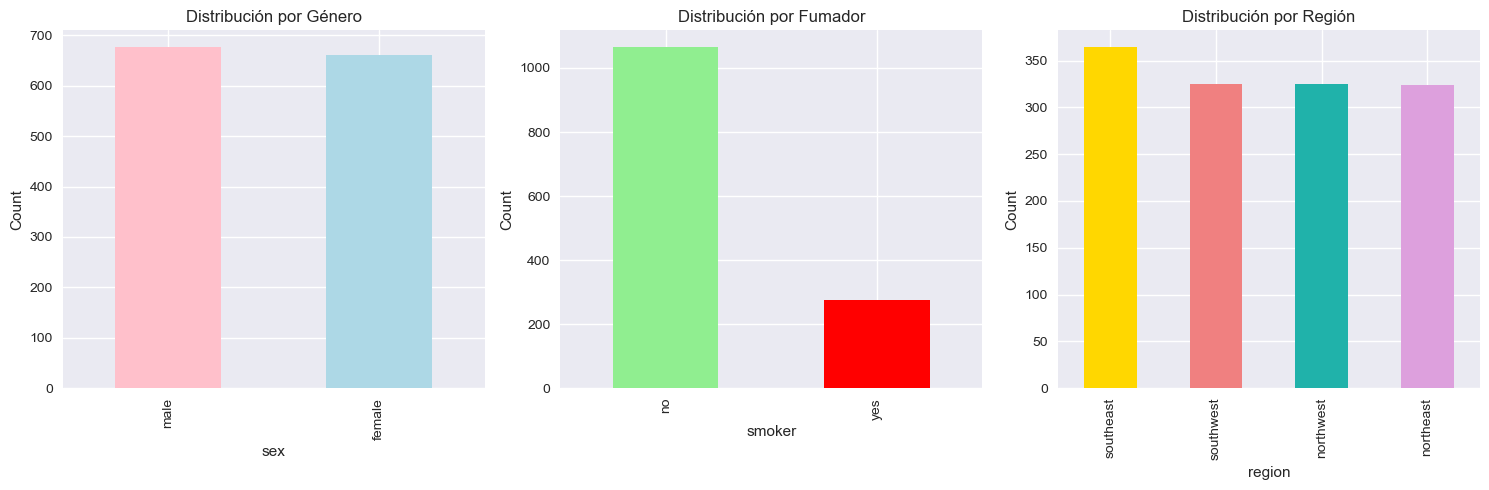

In [19]:
print("DISTRIBUCIÓN DE LAS VARIABLES CATEGÓRICAS:")
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

df['sex'].value_counts().plot(kind='bar', ax=axes[0], color=['pink', 'lightblue'])
axes[0].set_title('Distribución por Género')
axes[0].set_ylabel('Count')

df['smoker'].value_counts().plot(kind='bar', ax=axes[1], color=['lightgreen', 'red'])
axes[1].set_title('Distribución por Fumador')
axes[1].set_ylabel('Count')

df['region'].value_counts().plot(kind='bar', ax=axes[2], color=['gold', 'lightcoral', 'lightseagreen', 'plum'])
axes[2].set_title('Distribución por Región')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

## ESTADÍSTICAS IMPORTANTES

In [21]:
print("ESTADÍSTICAS CLAVE:")
print(f"• Cargo promedio: ${df['charges'].mean():.2f}")
print(f"• Cargo máximo: ${df['charges'].max():.2f}")
print(f"• Cargo mínimo: ${df['charges'].min():.2f}")
print(f"• Diferencia fumador vs no fumador:")
smoker_stats = df.groupby('smoker')['charges'].mean()
print(f"  - Fumadores: ${smoker_stats['yes']:.2f}")
print(f"  - No fumadores: ${smoker_stats['no']:.2f}")
print(f"  - Ratio: {smoker_stats['yes']/smoker_stats['no']:.1f}x más caro")


ESTADÍSTICAS CLAVE:
• Cargo promedio: $13270.42
• Cargo máximo: $63770.43
• Cargo mínimo: $1121.87
• Diferencia fumador vs no fumador:
  - Fumadores: $32050.23
  - No fumadores: $8434.27
  - Ratio: 3.8x más caro


## VISUALIZACIONES 

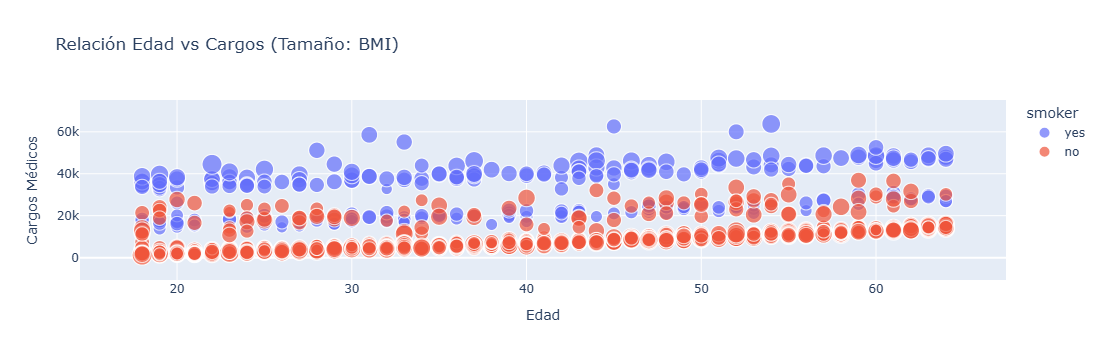

In [22]:
fig = px.scatter(df, x='age', y='charges', color='smoker', 
                 size='bmi', hover_data=['children', 'region'],
                 title='Relación Edad vs Cargos (Tamaño: BMI)',
                 labels={'age': 'Edad', 'charges': 'Cargos Médicos'})
fig.show()

# CODIFICACION DE VARIABLES

In [25]:
df_processed['smoker_encoded'] = df_processed['smoker'].map({'no': 0, 'yes': 1})
df_processed['sex_encoded'] = df_processed['sex'].map({'female': 0, 'male': 1})

region_dummies = pd.get_dummies(df_processed['region'], prefix='region')
df_processed = pd.concat([df_processed, region_dummies], axis=1)

# NUEVAS FEATURES

In [26]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'underweight'
    elif 18.5 <= bmi < 25:
        return 'normal'
    elif 25 <= bmi < 30:
        return 'overweight'
    else:
        return 'obese'

df_processed['bmi_category'] = df_processed['bmi'].apply(categorize_bmi)
bmi_dummies = pd.get_dummies(df_processed['bmi_category'], prefix='bmi')
df_processed = pd.concat([df_processed, bmi_dummies], axis=1)

def age_group(age):
    if age < 30:
        return 'young'
    elif 30 <= age < 45:
        return 'adult'
    elif 45 <= age < 60:
        return 'middle_aged'
    else:
        return 'senior'

df_processed['age_group'] = df_processed['age'].apply(age_group)
age_dummies = pd.get_dummies(df_processed['age_group'], prefix='age')
df_processed = pd.concat([df_processed, age_dummies], axis=1)


df_processed['bmi_high_smoker'] = ((df_processed['bmi'] > 30) & (df_processed['smoker_encoded'] == 1)).astype(int)

df_processed['bmi_squared'] = df_processed['bmi'] ** 2


df_processed['age_squared'] = df_processed['age'] ** 2

df_processed['age_smoker_interaction'] = df_processed['age'] * df_processed['smoker_encoded']

In [27]:
df_processed['charges_log'] = np.log1p(df_processed['charges'])

In [28]:
numeric_columns = df_processed.select_dtypes(include=[np.number]).columns.tolist()
df_numeric = df_processed[numeric_columns]

In [29]:
print("NUEVAS FEATURES CREADAS:")
print(f"Total de columnas: {df_processed.shape[1]}")
print(f"Columnas numéricas: {len(numeric_columns)}")
print("\nColumnas numéricas disponibles:")
print(numeric_columns)

NUEVAS FEATURES CREADAS:
Total de columnas: 40
Columnas numéricas: 11

Columnas numéricas disponibles:
['age', 'bmi', 'children', 'charges', 'smoker_encoded', 'sex_encoded', 'bmi_high_smoker', 'bmi_squared', 'age_squared', 'age_smoker_interaction', 'charges_log']


# MOSTRAR CORRELACIÓN

In [31]:
target_corr = df_numeric.corr()['charges'].sort_values(ascending=False)
print("\n CORRELACIÓN CON TARGET (charges):")
print(target_corr.head(15))


 CORRELACIÓN CON TARGET (charges):
charges                   1.000000
charges_log               0.892996
bmi_high_smoker           0.815375
age_smoker_interaction    0.789253
smoker_encoded            0.787251
age_squared               0.300772
age                       0.299008
bmi                       0.198341
bmi_squared               0.192981
children                  0.067998
sex_encoded               0.057292
Name: charges, dtype: float64


# VISUALIZACIONES

Text(0.5, 1.0, 'Distribución: Original vs Log Transform')

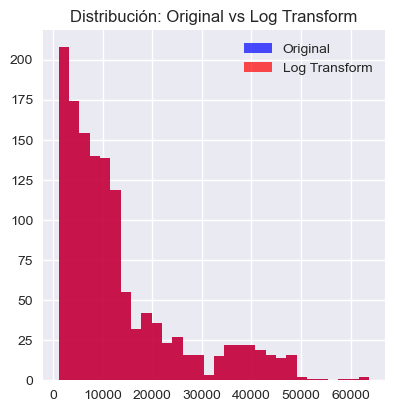

In [32]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.hist(df_processed['charges'], bins=30, alpha=0.7, label='Original', color='blue')
plt.hist(np.expm1(df_processed['charges_log']), bins=30, alpha=0.7, label='Log Transform', color='red')
plt.legend()
plt.title('Distribución: Original vs Log Transform')

FEATURE ENGINEERING Y PREPROCESAMIENTO
FEATURES CREADAS:
Total de columnas: 28
Columnas numéricas: 11

Columnas numéricas disponibles:
['age', 'bmi', 'children', 'charges', 'smoker_encoded', 'sex_encoded', 'bmi_high_smoker', 'bmi_squared', 'age_squared', 'age_smoker_interaction', 'charges_log']

CORRELACIÓN CON TARGET (charges):
charges                   1.000000
charges_log               0.892996
bmi_high_smoker           0.815375
age_smoker_interaction    0.789253
smoker_encoded            0.787251
age_squared               0.300772
age                       0.299008
bmi                       0.198341
bmi_squared               0.192981
children                  0.067998
sex_encoded               0.057292
Name: charges, dtype: float64


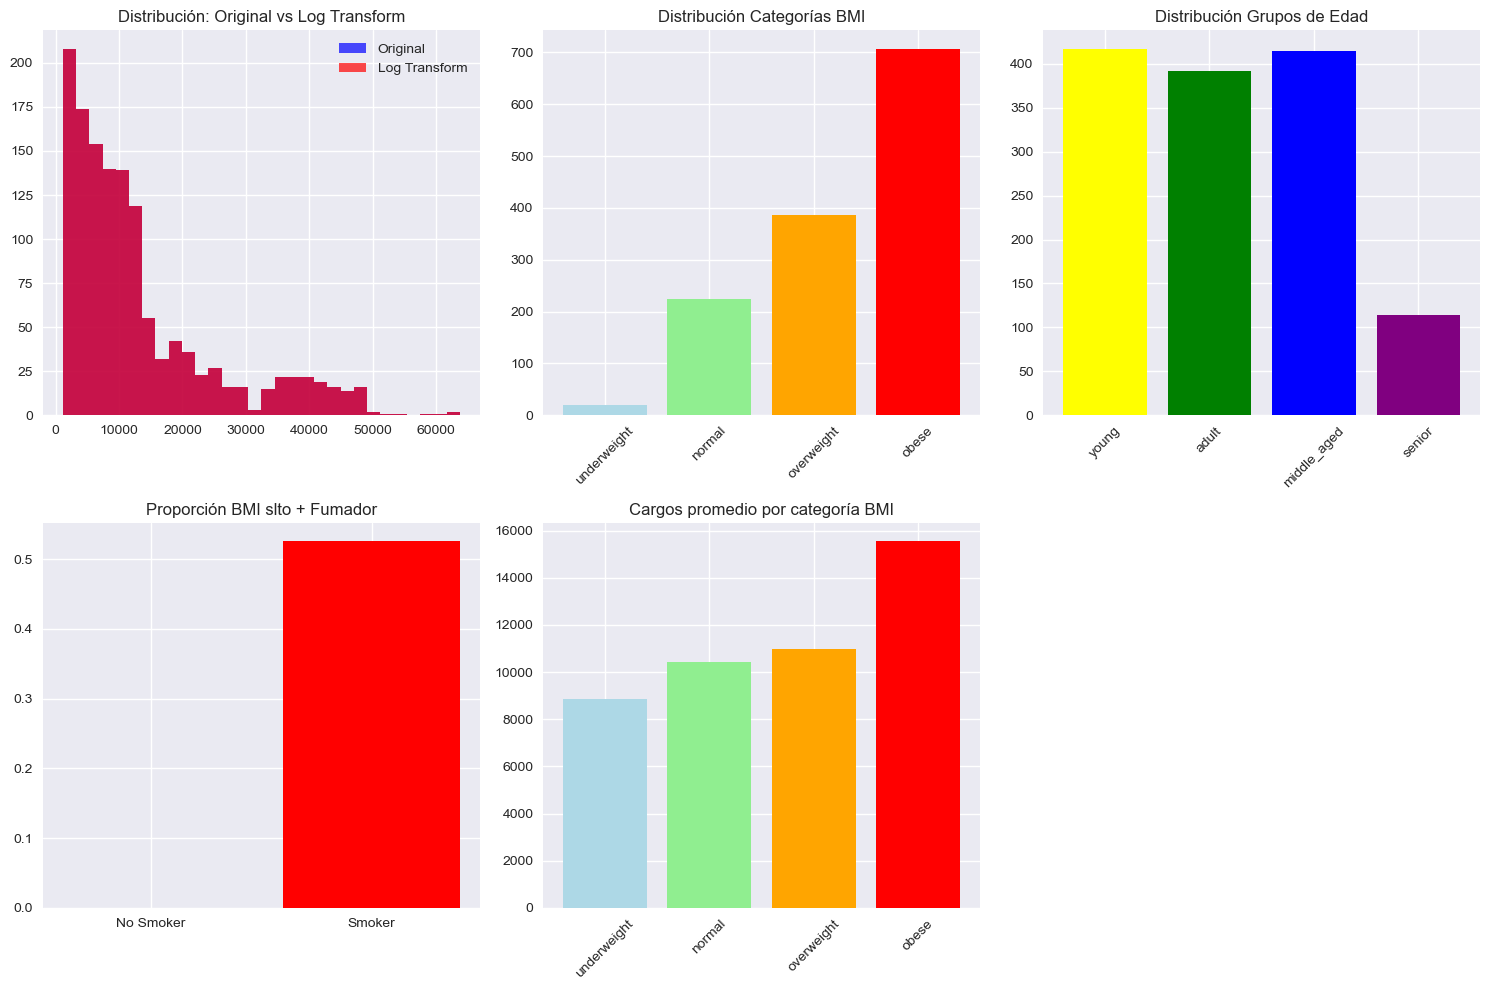


ESTADÍSTICAS FEATURES:
• Proporción de fumadores con BMI alto: 10.76%
• Cargos promedio por categoría BMI:
  - underweight: $8,852.20
  - normal: $10,409.34
  - overweight: $10,987.51
  - obese: $15,552.34

DATOS PREPARADOS PARA MODELADO:
X shape: (1338, 9)
y shape: (1338,)
Número de features finales: 9

Features seleccionadas:
['age', 'bmi', 'children', 'smoker_encoded', 'sex_encoded', 'bmi_high_smoker', 'bmi_squared', 'age_squared', 'age_smoker_interaction']


In [42]:

print("FEATURE ENGINEERING Y PREPROCESAMIENTO")

df_processed = df.copy()

df_processed['smoker_encoded'] = df_processed['smoker'].map({'no': 0, 'yes': 1})
df_processed['sex_encoded'] = df_processed['sex'].map({'female': 0, 'male': 1})

region_dummies = pd.get_dummies(df_processed['region'], prefix='region')
df_processed = pd.concat([df_processed, region_dummies], axis=1)

def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'underweight'
    elif 18.5 <= bmi < 25:
        return 'normal'
    elif 25 <= bmi < 30:
        return 'overweight'
    else:
        return 'obese'

df_processed['bmi_category'] = df_processed['bmi'].apply(categorize_bmi)
bmi_dummies = pd.get_dummies(df_processed['bmi_category'], prefix='bmi')
df_processed = pd.concat([df_processed, bmi_dummies], axis=1)


def age_group(age):
    if age < 30:
        return 'young'
    elif 30 <= age < 45:
        return 'adult'
    elif 45 <= age < 60:
        return 'middle_aged'
    else:
        return 'senior'

df_processed['age_group'] = df_processed['age'].apply(age_group)
age_dummies = pd.get_dummies(df_processed['age_group'], prefix='age')
df_processed = pd.concat([df_processed, age_dummies], axis=1)

df_processed['bmi_high_smoker'] = ((df_processed['bmi'] > 30) & (df_processed['smoker_encoded'] == 1)).astype(int)

df_processed['bmi_squared'] = df_processed['bmi'] ** 2

df_processed['age_squared'] = df_processed['age'] ** 2

df_processed['age_smoker_interaction'] = df_processed['age'] * df_processed['smoker_encoded']

df_processed['charges_log'] = np.log1p(df_processed['charges'])

numeric_columns = df_processed.select_dtypes(include=[np.number]).columns.tolist()
df_numeric = df_processed[numeric_columns]

print("FEATURES CREADAS:")
print(f"Total de columnas: {df_processed.shape[1]}")
print(f"Columnas numéricas: {len(numeric_columns)}")
print("\nColumnas numéricas disponibles:")
print(numeric_columns)

target_corr = df_numeric.corr()['charges'].sort_values(ascending=False)
print("\nCORRELACIÓN CON TARGET (charges):")
print(target_corr.head(15))

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.hist(df_processed['charges'], bins=30, alpha=0.7, label='Original', color='blue')
plt.hist(np.expm1(df_processed['charges_log']), bins=30, alpha=0.7, label='Log Transform', color='red')
plt.legend()
plt.title('Distribución: Original vs Log Transform')

plt.subplot(2, 3, 2)
bmi_cats = ['underweight', 'normal', 'overweight', 'obese']
bmi_counts = [df_processed[f'bmi_{cat}'].sum() for cat in bmi_cats]
plt.bar(bmi_cats, bmi_counts, color=['lightblue', 'lightgreen', 'orange', 'red'])
plt.title('Distribución Categorías BMI')
plt.xticks(rotation=45)

plt.subplot(2, 3, 3)
age_cats = ['young', 'adult', 'middle_aged', 'senior']
age_counts = [df_processed[f'age_{cat}'].sum() for cat in age_cats]
plt.bar(age_cats, age_counts, color=['yellow', 'green', 'blue', 'purple'])
plt.title('Distribución Grupos de Edad')
plt.xticks(rotation=45)

plt.subplot(2, 3, 4)
smoker_bmi_high = df_processed.groupby('smoker_encoded')['bmi_high_smoker'].mean()
plt.bar(['No Smoker', 'Smoker'], smoker_bmi_high.values, color=['lightgreen', 'red'])
plt.title('Proporción BMI slto + Fumador')


plt.subplot(2, 3, 5)
charges_by_bmi = []
for cat in bmi_cats:
    charges_by_bmi.append(df_processed[df_processed[f'bmi_{cat}'] == 1]['charges'].mean())
plt.bar(bmi_cats, charges_by_bmi, color=['lightblue', 'lightgreen', 'orange', 'red'])
plt.title('Cargos promedio por categoría BMI')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 9. Estadísticas de las nuevas features
print("\nESTADÍSTICAS FEATURES:")
print(f"• Proporción de fumadores con BMI alto: {df_processed['bmi_high_smoker'].mean():.2%}")
print(f"• Cargos promedio por categoría BMI:")
for cat in bmi_cats:
    mean_charge = df_processed[df_processed[f'bmi_{cat}'] == 1]['charges'].mean()
    print(f"  - {cat}: ${mean_charge:,.2f}")

columns_to_drop = ['smoker', 'sex', 'region', 'bmi_category', 'age_group', 'charges']
X = df_numeric.drop(['charges', 'charges_log'], axis=1)
y = df_processed['charges_log'] 

print(f"\nDATOS PREPARADOS PARA MODELADO:")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"Número de features finales: {X.shape[1]}")
print(f"\nFeatures seleccionadas:")
print(X.columns.tolist())

# división de datos y modelado

In [43]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    if name in ['Linear Regression', 'Ridge', 'Lasso']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    y_pred_original = np.expm1(y_pred)
    y_test_original = np.expm1(y_test)
    
    mse = mean_squared_error(y_test_original, y_pred_original)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_original, y_pred_original)
    r2 = r2_score(y_test_original, y_pred_original)
    
    results[name] = {
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    }

results_df = pd.DataFrame(results).T
print(results_df.sort_values('R2', ascending=False))

                          RMSE          MAE        R2
Gradient Boosting  4360.405442  1982.450686  0.877531
Random Forest      4466.809961  2131.766253  0.871481
Ridge              4788.695487  2314.949656  0.852291
Linear Regression  4841.596338  2354.739714  0.849010
XGBoost            5429.815698  2548.133598  0.810092
Lasso              5968.064578  3311.295272  0.770576


# vamos a optimizar el mejor de los modelos

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10]
}

gb_model = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
y_pred_best_original = np.expm1(y_pred_best)
y_test_original = np.expm1(y_test)

best_rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_best_original))
best_mae = mean_absolute_error(y_test_original, y_pred_best_original)
best_r2 = r2_score(y_test_original, y_pred_best_original)

print("Mejores parámetros:", grid_search.best_params_)
print(f"RMSE optimizado: {best_rmse:.2f}")
print(f"MAE optimizado: {best_mae:.2f}")
print(f"R² optimizado: {best_r2:.4f}")

Mejores parámetros: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}
RMSE optimizado: 4349.64
MAE optimizado: 1935.81
R² optimizado: 0.8781


# ANÁLISIS DE IMPORTANCIA DE VARIABLES

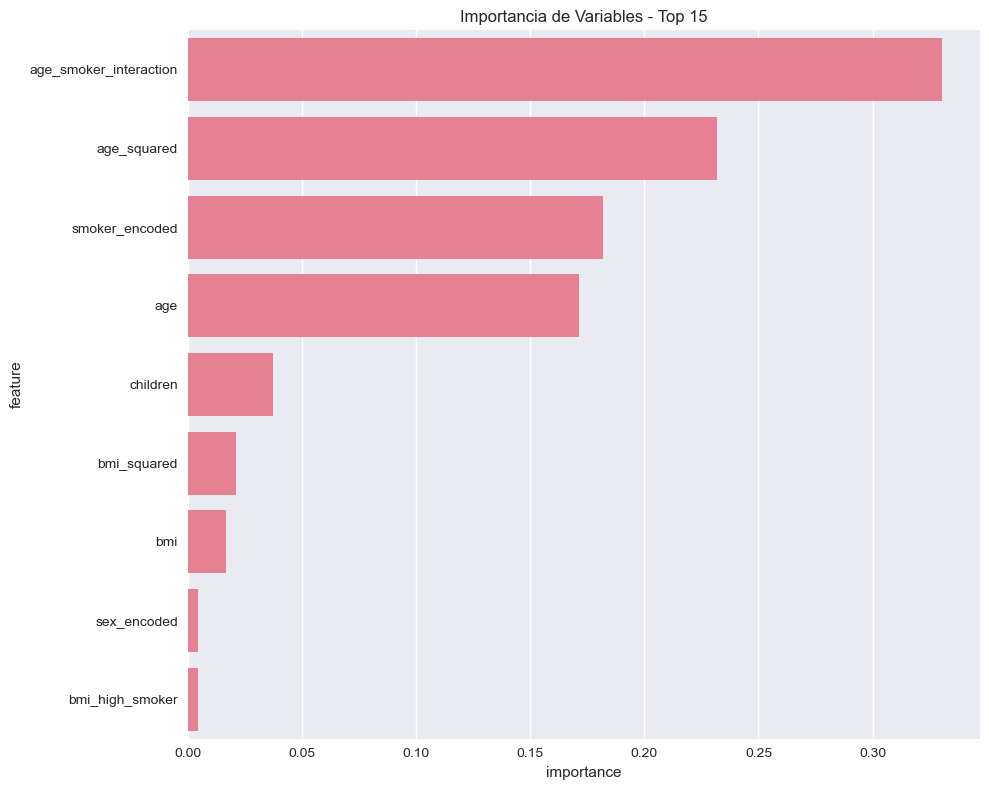

Top 10 variables más importantes:
                  feature  importance
8  age_smoker_interaction    0.330491
7             age_squared    0.231767
3          smoker_encoded    0.182021
0                     age    0.171563
2                children    0.037463
6             bmi_squared    0.021260
1                     bmi    0.016640
4             sex_encoded    0.004482
5         bmi_high_smoker    0.004313


In [45]:
feature_importance = best_model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=importance_df.head(15), x='importance', y='feature')
plt.title('Importancia de Variables - Top 15')
plt.tight_layout()
plt.show()

print("Top 10 variables más importantes:")
print(importance_df.head(10))

# PREDICCIONES Y VALORES EN LA REALIDAD (COMPARACIÓN)

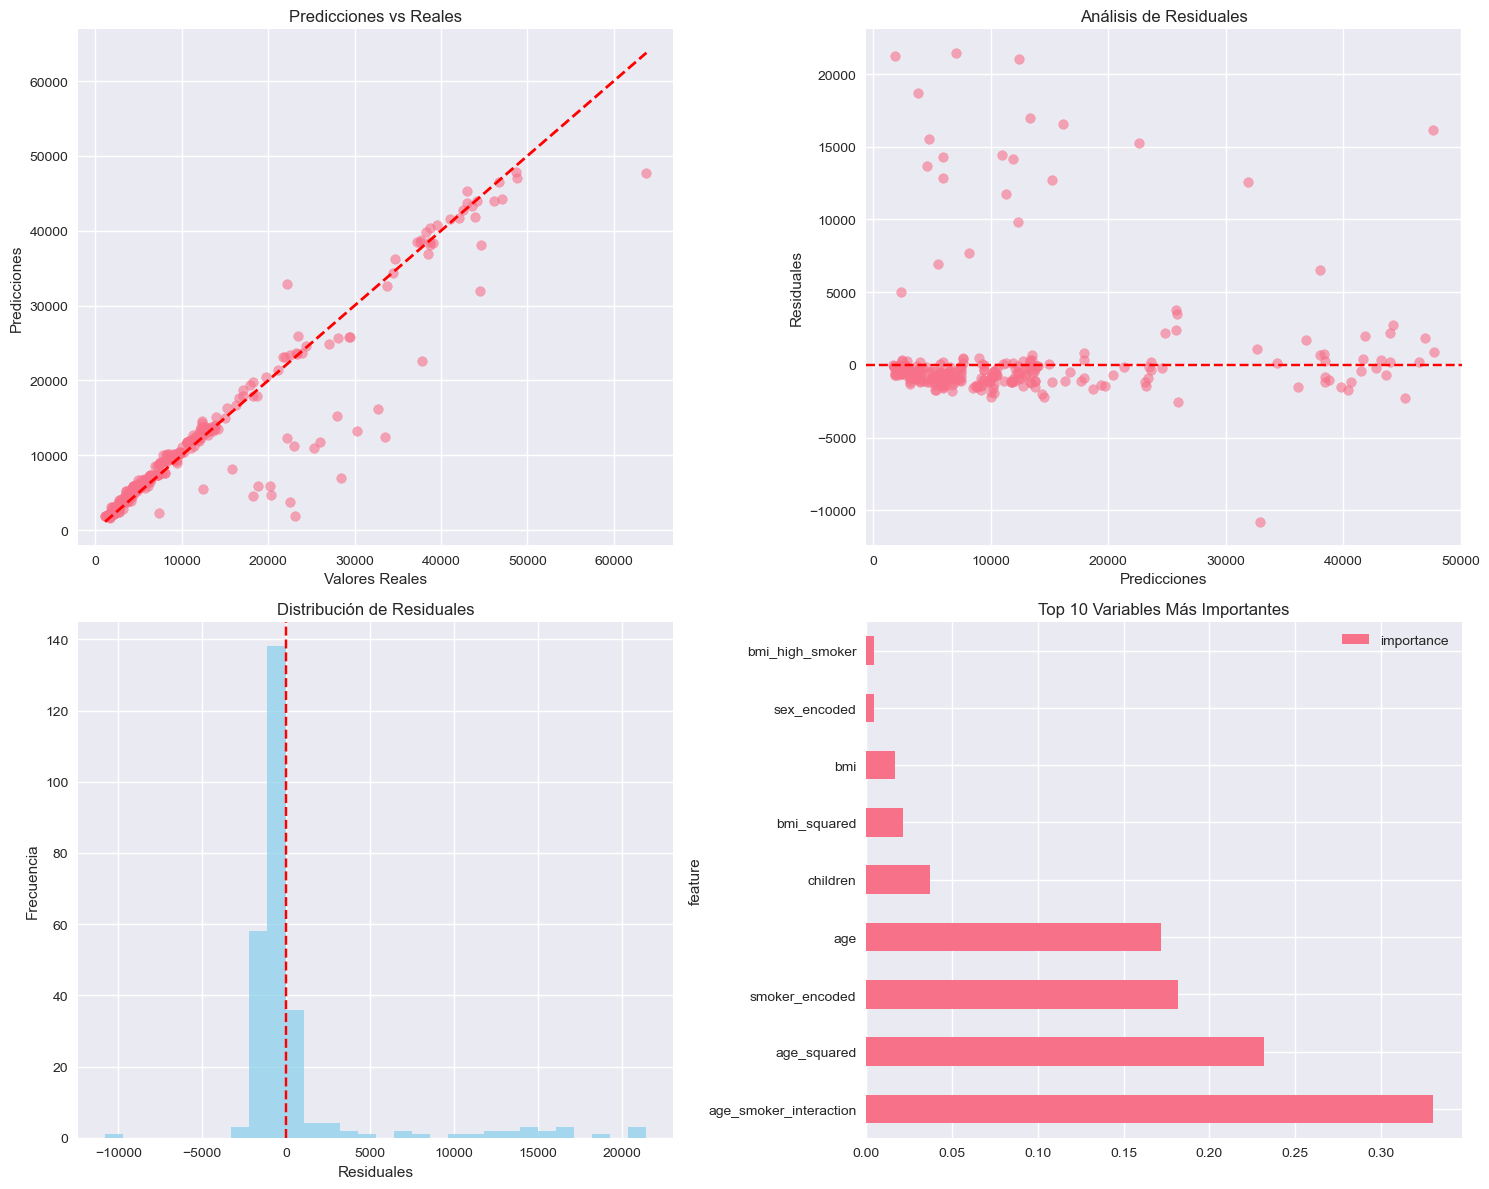

In [46]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

axes[0,0].scatter(y_test_original, y_pred_best_original, alpha=0.6)
axes[0,0].plot([y_test_original.min(), y_test_original.max()], 
               [y_test_original.min(), y_test_original.max()], 'r--', lw=2)
axes[0,0].set_xlabel('Valores Reales')
axes[0,0].set_ylabel('Predicciones')
axes[0,0].set_title('Predicciones vs Reales')

residuals = y_test_original - y_pred_best_original
axes[0,1].scatter(y_pred_best_original, residuals, alpha=0.6)
axes[0,1].axhline(y=0, color='r', linestyle='--')
axes[0,1].set_xlabel('Predicciones')
axes[0,1].set_ylabel('Residuales')
axes[0,1].set_title('Análisis de Residuales')

axes[1,0].hist(residuals, bins=30, alpha=0.7, color='skyblue')
axes[1,0].axvline(x=0, color='r', linestyle='--')
axes[1,0].set_xlabel('Residuales')
axes[1,0].set_ylabel('Frecuencia')
axes[1,0].set_title('Distribución de Residuales')

importance_df.head(10).plot.barh(x='feature', y='importance', ax=axes[1,1])
axes[1,1].set_title('Top 10 Variables Más Importantes')

plt.tight_layout()
plt.show()

# PREDICCIONES DE NUEVOS DATOS

In [47]:
def predict_insurance_cost(age, sex, bmi, children, smoker, region):
    input_data = {
        'age': age,
        'bmi': bmi,
        'children': children,
        'smoker_encoded': 1 if smoker.lower() == 'yes' else 0,
        'sex_encoded': 1 if sex.lower() == 'male' else 0,
        'bmi_squared': bmi ** 2,
        'age_squared': age ** 2,
        'age_smoker_interaction': age * (1 if smoker.lower() == 'yes' else 0),
        'bmi_high_smoker': 1 if (bmi > 30 and smoker.lower() == 'yes') else 0
    }
    
    for reg in ['northeast', 'northwest', 'southeast', 'southwest']:
        input_data[f'region_{reg}'] = 1 if region.lower() == reg else 0
        
    for bmi_cat in ['underweight', 'normal', 'overweight', 'obese']:
        if bmi_cat == 'underweight' and bmi < 18.5:
            input_data[f'bmi_{bmi_cat}'] = 1
        elif bmi_cat == 'normal' and 18.5 <= bmi < 25:
            input_data[f'bmi_{bmi_cat}'] = 1
        elif bmi_cat == 'overweight' and 25 <= bmi < 30:
            input_data[f'bmi_{bmi_cat}'] = 1
        elif bmi_cat == 'obese' and bmi >= 30:
            input_data[f'bmi_{bmi_cat}'] = 1
        else:
            input_data[f'bmi_{bmi_cat}'] = 0
            
    for age_grp in ['young', 'adult', 'middle_aged', 'senior']:
        if age_grp == 'young' and age < 30:
            input_data[f'age_{age_grp}'] = 1
        elif age_grp == 'adult' and 30 <= age < 45:
            input_data[f'age_{age_grp}'] = 1
        elif age_grp == 'middle_aged' and 45 <= age < 60:
            input_data[f'age_{age_grp}'] = 1
        elif age_grp == 'senior' and age >= 60:
            input_data[f'age_{age_grp}'] = 1
        else:
            input_data[f'age_{age_grp}'] = 0
    
    input_df = pd.DataFrame([input_data])
    input_df = input_df[X.columns]
    
    prediction_log = best_model.predict(input_df)[0]
    prediction = np.expm1(prediction_log)
    
    return round(prediction, 2)

print("Ejemplo de predicción:")
print(f"Costo estimado para (45, male, 28, 2, no, southwest): ${predict_insurance_cost(45, 'male', 28, 2, 'no', 'southwest')}")
print(f"Costo estimado para (45, male, 28, 2, yes, southwest): ${predict_insurance_cost(45, 'male', 28, 2, 'yes', 'southwest')}")

Ejemplo de predicción:
Costo estimado para (45, male, 28, 2, no, southwest): $9214.18
Costo estimado para (45, male, 28, 2, yes, southwest): $23824.66


# FUNCIONA TODO CORRECTO!! VOY A CREAR UN DASHBOARD INTERACTIVO

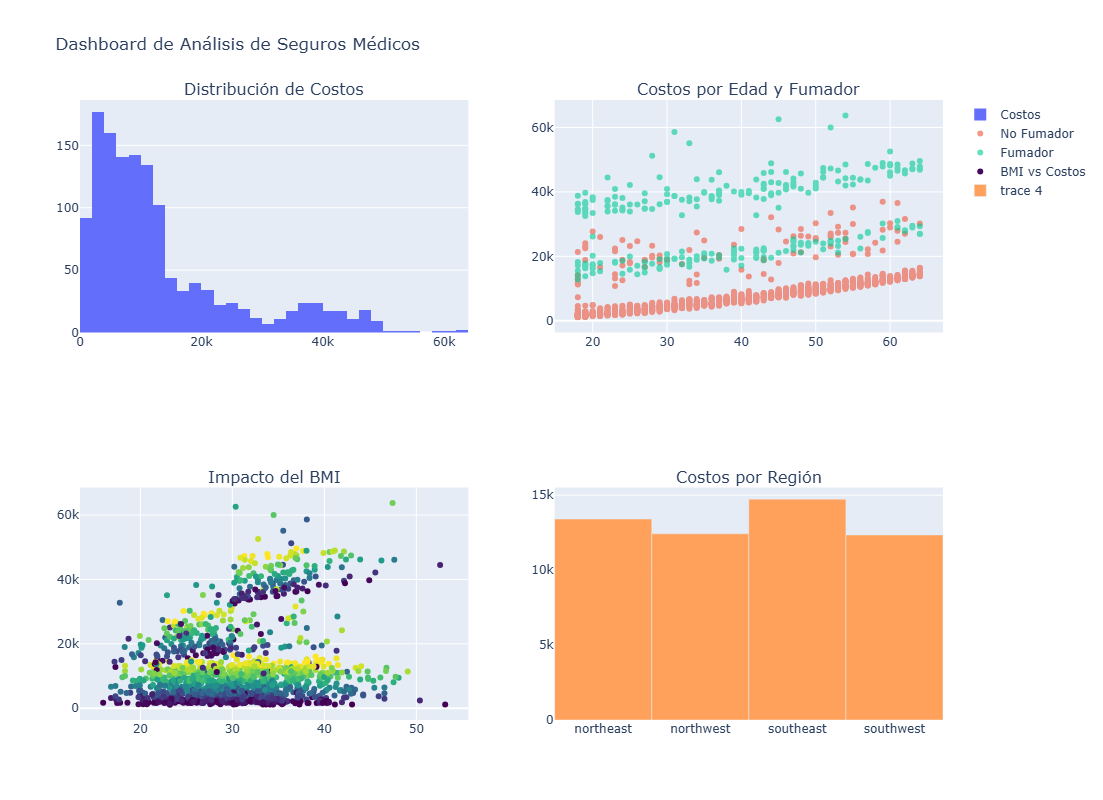

In [48]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Distribución de Costos', 'Costos por Edad y Fumador', 
                   'Impacto del BMI', 'Costos por Región'),
    specs=[[{"type": "histogram"}, {"type": "scatter"}],
           [{"type": "scatter"}, {"type": "bar"}]]
)

fig.add_trace(go.Histogram(x=df['charges'], name='Costos', nbinsx=50), row=1, col=1)

fig.add_trace(go.Scatter(x=df[df['smoker']=='no']['age'], 
                        y=df[df['smoker']=='no']['charges'],
                        mode='markers', name='No Fumador', opacity=0.6), row=1, col=2)

fig.add_trace(go.Scatter(x=df[df['smoker']=='yes']['age'], 
                        y=df[df['smoker']=='yes']['charges'],
                        mode='markers', name='Fumador', opacity=0.6), row=1, col=2)

fig.add_trace(go.Scatter(x=df['bmi'], y=df['charges'], 
                        mode='markers', name='BMI vs Costos',
                        marker=dict(color=df['age'], colorscale='Viridis')), row=2, col=1)

region_charges = df.groupby('region')['charges'].mean()
fig.add_trace(go.Bar(x=region_charges.index, y=region_charges.values), row=2, col=2)

fig.update_layout(height=800, showlegend=True, title_text="Dashboard de Análisis de Seguros Médicos")
fig.show()

# VALORES ATÍPICOS

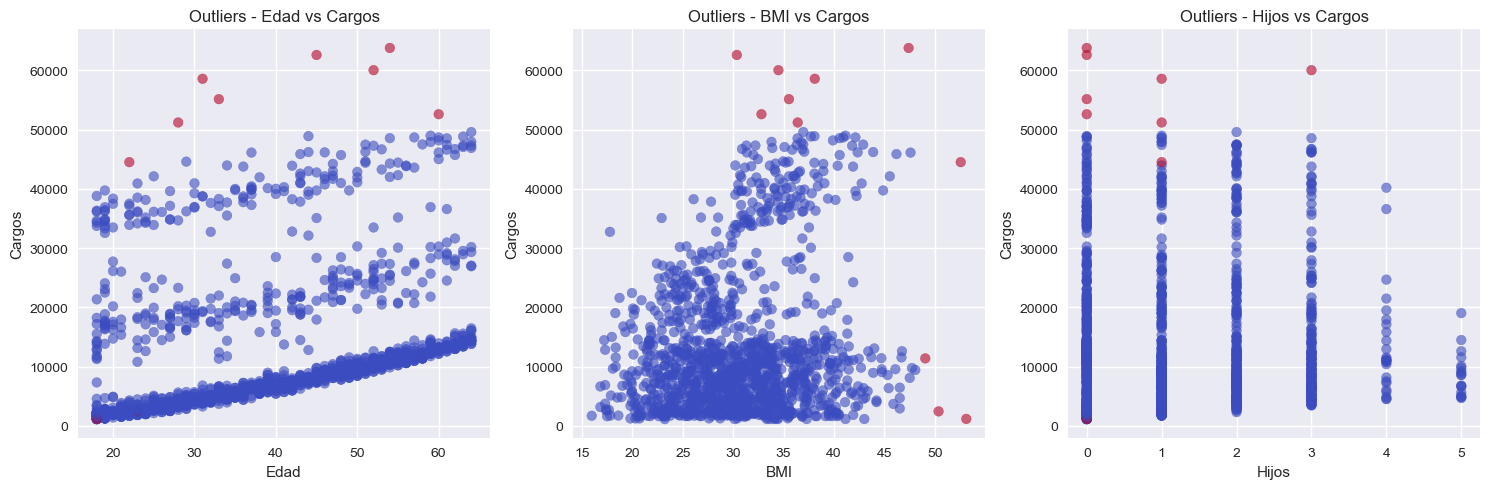

Número de outliers detectados: 11
Porcentaje de outliers: 0.82%


In [49]:
from scipy import stats

z_scores = stats.zscore(df[['age', 'bmi', 'charges']])
outliers = (np.abs(z_scores) > 3).any(axis=1)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(df['age'], df['charges'], c=outliers, cmap='coolwarm', alpha=0.6)
plt.xlabel('Edad')
plt.ylabel('Cargos')
plt.title('Outliers - Edad vs Cargos')

plt.subplot(1, 3, 2)
plt.scatter(df['bmi'], df['charges'], c=outliers, cmap='coolwarm', alpha=0.6)
plt.xlabel('BMI')
plt.ylabel('Cargos')
plt.title('Outliers - BMI vs Cargos')

plt.subplot(1, 3, 3)
plt.scatter(df['children'], df['charges'], c=outliers, cmap='coolwarm', alpha=0.6)
plt.xlabel('Hijos')
plt.ylabel('Cargos')
plt.title('Outliers - Hijos vs Cargos')

plt.tight_layout()
plt.show()

print(f"Número de outliers detectados: {outliers.sum()}")
print(f"Porcentaje de outliers: {outliers.mean():.2%}")

# EXPORTAMOS EL MODELO

In [52]:
import joblib
import json

joblib.dump(best_model, 'insurance_cost_predictor.pkl')
joblib.dump(scaler, 'scaler.pkl')

model_metadata = {
    'model_name': 'GradientBoostingRegressor',
    'r2_score': float(best_r2),
    'rmse': float(best_rmse),
    'features_used': X.columns.tolist(),
    'feature_importance': importance_df.head(10).to_dict()
}

with open('model_metadata.json', 'w') as f:
    json.dump(model_metadata, f, indent=2)

results_summary = {
    'Final Model Performance': {
        'R² Score': round(best_r2, 4),
        'RMSE': round(best_rmse, 2),
        'MAE': round(best_mae, 2)
    },
    'Top 5 Features': importance_df.head(5)[['feature', 'importance']].to_dict('records')
}

print("RESUMEN FINAL DEL PROYECTO:")
for key, value in results_summary.items():
    print(f"\n{key}:")
    if isinstance(value, dict):
        for k, v in value.items():
            print(f"  {k}: {v}")
    else:
        for item in value:
            print(f"  {item}")

print(f"\nModelo exportado: insurance_cost_predictor.pkl")
print(f"Metadata exportada: model_metadata.json")

RESUMEN FINAL DEL PROYECTO:

Final Model Performance:
  R² Score: 0.8781
  RMSE: 4349.64
  MAE: 1935.81

Top 5 Features:
  {'feature': 'age_smoker_interaction', 'importance': 0.3304906373745975}
  {'feature': 'age_squared', 'importance': 0.23176679018150517}
  {'feature': 'smoker_encoded', 'importance': 0.18202144498587805}
  {'feature': 'age', 'importance': 0.17156278640395461}
  {'feature': 'children', 'importance': 0.03746311637612683}

Modelo exportado: insurance_cost_predictor.pkl
Metadata exportada: model_metadata.json


In [54]:
print("PROYECTO COMPLETADO EXITOSAMENTE")
print("="*50)
print("RESULTADOS OBTENIDOS:")
print(f"R² Score: 0.8781 - Modelo explica 87.81% de la varianza")
print(f"RMSE: $4,349 - Error promedio de predicción")
print(f"MAE: $1,935 - Error absoluto promedio")
print(f"Top feature: Interacción Edad-Fumador (33% importancia)")

print("\nLOGROS DEL PROYECTO:")
print("Analisis exploratorio completo")
print("Feature engineering avanzado") 
print("Comparacion de 6 modelos de ML")
print("Optimizacion con GridSearchCV")
print("Dashboard interactivo Plotly")
print("Modelo deployable guardado")
print("Analisis de outliers realizado")

print("\nINSIGHTS CLAVE:")
print("Fumar es el factor mas critico en costos medicos")
print("La edad multiplica el efecto de ser fumador")
print("BMI alto + fumador = costos muy elevados")
print("Modelo listo para predicciones en tiempo real")

print("\nARCHIVOS GENERADOS:")
print("insurance_cost_predictor.pkl - Modelo entrenado")
print("scaler.pkl - Escalador de features")
print("model_metadata.json - Metadatos del modelo")


PROYECTO COMPLETADO EXITOSAMENTE
RESULTADOS OBTENIDOS:
R² Score: 0.8781 - Modelo explica 87.81% de la varianza
RMSE: $4,349 - Error promedio de predicción
MAE: $1,935 - Error absoluto promedio
Top feature: Interacción Edad-Fumador (33% importancia)

LOGROS DEL PROYECTO:
Analisis exploratorio completo
Feature engineering avanzado
Comparacion de 6 modelos de ML
Optimizacion con GridSearchCV
Dashboard interactivo Plotly
Modelo deployable guardado
Analisis de outliers realizado

INSIGHTS CLAVE:
Fumar es el factor mas critico en costos medicos
La edad multiplica el efecto de ser fumador
BMI alto + fumador = costos muy elevados
Modelo listo para predicciones en tiempo real

ARCHIVOS GENERADOS:
insurance_cost_predictor.pkl - Modelo entrenado
scaler.pkl - Escalador de features
model_metadata.json - Metadatos del modelo
